# Pandas1 : 판다스

In [1]:
import pandas as pd
import numpy as np

---

### 1.판다스의 개념
판다스는 데이터 분석 라이브러리로 '파이썬계의 엑셀'이라고 생각하면 된다. 데이터 테이블을 다루기 위한 도구로 가장 적합하다  
판다스의 가장 큰 특징인 데이터를 다루기 위해 배열 계산 라이브러리인 넘파이를 기본적으로 사용한다. 판다스는 데이터 테이블를 다루는 객체를 **데이터프레임(DateFrame)** 이라고 부르며 각각의 열 데이터를 다루는 객체는 **시리즈(Series)** 라고 부른다.

---

### 2.시리즈 객체
**시리즈** 객체는 피쳐 벡터(feature vector)와 같은 개념으로 사용하는데, 일반적으로 하나의 피쳐 데이터를 포함하는 형태로 다루어진다. 시리즈 객체는 생성된 데이터프레임 안에 포함되기도 하지만 list,dict,ndarray 등과 같은 다양한 데이터 타입이 시리즈 객체 형태로 변환될 수 있다.

In [7]:
list_data=[1,2,3,4,5]
list_name=['a','b','c','d','e']

example_obj=pd.Series(data=list_data,index=list_name)
print(example_obj)

a    1
b    2
c    3
d    4
e    5
dtype: int64


시리즈 객체를 생성하면 기본적으로 세 가지 요소(property)인 데이터, 인덱스, 데이터 타입이 생성된다.  

● **데이터** : 데이터는 기존 다른 객체처럼 값을 저장하는 요소  

● **인덱스** : 인덱스는 항상 0부터 시작하고, 숫자로만 할당하는 값. 시리즈 객체에서는 숫자 외에도 문자열이나 0 외에 다른 값으로 시작하는 숫자, 또는 순서가 일정하지 않은 숫자값을 입력할 수도 있다. 이런 식으로 인덱스 값을 입력할 수 있도록 한 가장 큰 이유는 데이터를 다룰 때 데이터의 아이디(id)값을 인덱스로 삼아서 다뤄야 할 때가 있기 때문이다. 시리즈 객체에서는 인덱스 값의 중복을 허용한다.  

● **데이터 타입** : 데이터 타입은 정확히 넘파이의 데이터 타입과 일치한다. 기본적으로 판다스는 넘파이의 래퍼(wrapper) 라이브러리로 이해해야 하고, 넘파이에서 사용하는 모든 기능을 지원한다.  

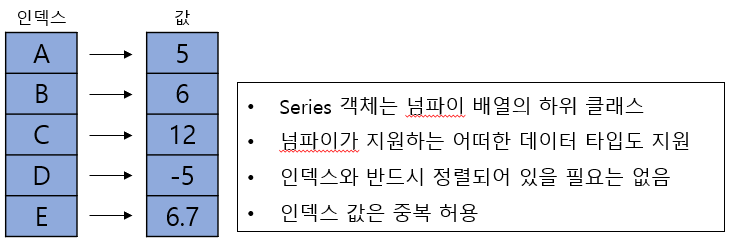

In [2]:
##실제로 생성된 객체의 내용을 출력하면 다음 코드와 같다
list_data=[1,2,3,4,5]
list_name=['a','b','c','d','e']

example_obj=pd.Series(data=list_data,index=list_name)
print(example_obj)

a    1
b    2
c    3
d    4
e    5
dtype: int64


In [4]:
print(example_obj.index)   ##list_name 객체 값이 출력
print(example_obj.values)  ##값을 보기 위해선 values 사용

Index(['a', 'b', 'c', 'd', 'e'], dtype='object')
[1 2 3 4 5]


In [7]:
print(type(example_obj.values)) ##넘파이 배열 타입
print(example_obj.dtype)        ##데이터 타입을 보면 넘파이의 데이터 타입과 동일

<class 'numpy.ndarray'>
int64


시리즈 객체의 경우 객체의 이름을 변경할 수 있는데, 일종의 열 이름을 지정해주는 방식이며 인엑스에 대한 이름도 추가 지정이 가능하다. 다음 코드는 시리즈 객체에 이름을 지정하는 코드이다.

In [9]:
example_obj.name='number'
example_obj.index.name = 'id'

In [10]:
print(example_obj)

id
a    1
b    2
c    3
d    4
e    5
Name: number, dtype: int64


시리즈 객체를 생성하는 가장 일반적인 방법은 먼저 데이터프레임 객체를 생성한 다음에 각 열에서 시리즈 객체를 뽑는 것이다. 하지만 이외에도 다양한 시퀸스형 데이터 타입에 대해 저장이 가능하며, 다음 코드와 같이 딕셔너리 타입으로 생성된다. 딕셔너리 타입에서 키(key)는 인덱스, 값(value)은 데이터 항목에 들어간다.

In [14]:
dict_data={'a':1, 'b':2, 'c':3, 'd':4, 'e':5}
example_obj =pd.Series(dict_data,dtype=np.float32, name='example_data')
print(example_obj)

a    1.0
b    2.0
c    3.0
d    4.0
e    5.0
Name: example_data, dtype: float32


일반적으로 판다스의 모든 객체는 인덱스 값을 기준으로 생성된다. 다음 코드와 같이 기존 데이터에 인덱스 값을 추가한다면 해당 값들은 '숫자가 아님(Not a Number)'을 의미하는 NaN 값이 출력된다.  
NaN은 'Null'값을 의미하며, 파이썬에서는 'None'을 의미한다.

In [16]:
dict_data1={'a':1, 'b':2, 'c':3, 'd':4, 'e':5}
indices=['a','b','c','d','e','f','g','h']

In [18]:
Series_obj=pd.Series(dict_data1,index=indices)
print(Series_obj)

a    1.0
b    2.0
c    3.0
d    4.0
e    5.0
f    NaN
g    NaN
h    NaN
dtype: float64


---

### 3. 데이터프레임 객체
**데이터프레임** 객체는 데이터 테이블 전체를 지칭하는 객체로, 여러 개의 시리즈 묶음으로 구성되어 있다. 기본적으로 데이터프레임 객체는 R을 이용하여 만들었다. 시리즈의 묶음이기 때문에 넘파이 배열의 특성을 그대로 가지고 있으며, 차이로 열 별로 데이터 타입이 다르다. 또한 행과 열을 각각 사용해서 하나의 데이터에 접근하는 인덱싱이 가능하다.  

#### 3-1.데이터프레임의 생성  
가장 기본적으로 데이터프레임을 생성하는 방법은 csv나 xlsx와 같은 확장자를 가진 파일에서 데이터를 로딩하는 것이다.

In [20]:
url = 'https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv'  ##타이타닉 생존자 데이터

df=pd.read_csv(url)

In [22]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


이외에도 데이터프레임을 직접 만들 수 있다. 다음 코드와 같이 딕셔너리 타입의 데이터에서 키(key)는 열 이름, 값(value)은 시퀸스형 데이터 타입을 넣어 각 열의 데이터로 만들 수 있다.

In [25]:
raw_data ={'first_name':['Jason','Molly','Tina','Jake','Amy'],
           'last_name':['Miller','Jacobson','Ali','Milner','Cooze'],
           'age':[42,52,36,24,73],
           'city':['SF','BLT','MI','DG','BST']}

df=pd.DataFrame(raw_data,columns=['first_name','last_name','age','city'])

In [26]:
df

,first_name,last_name,age,city
0,Jason,Miller,42,SF
1,Molly,Jacobson,52,BLT
2,Tina,Ali,36,MI
3,Jake,Milner,24,DG
4,Amy,Cooze,73,BST


#### 3-2.데이터프레임 열 다루기
시리즈 객체에서 가장 중요했던 것이 인덱스(index)였다면, 데이터프레임에서는 이에 더하여 열 이름을 선정하는 것이 중요하다.  
예를 들면 다음 코드와 같이 데이터가 생성될 때 열 이름을 한정한다면 해당 데이터의 열만 추출할 수 있다. 또한 데이터가 존재하지 않는 열을 추가한다면 해당 열에는 NaN 값들이 추가되어 생성된다.

In [27]:
pd.DataFrame(raw_data,columns=['age','city'])

,age,city
0,42,SF
1,52,BLT
2,36,MI
3,24,DG
4,73,BST


In [28]:
pd.DataFrame(raw_data,columns=['first_name','last_name','age','city','debt'])

,first_name,last_name,age,city,debt
0,Jason,Miller,42,SF,NaN
1,Molly,Jacobson,52,BLT,NaN
2,Tina,Ali,36,MI,NaN
3,Jake,Milner,24,DG,NaN
4,Amy,Cooze,73,BST,NaN
